In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df['person_age']=df['person_age'].astype('int')

In [5]:
df['person_age'].dtypes

dtype('int32')

In [6]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
education=df['person_education'].value_counts()
education

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

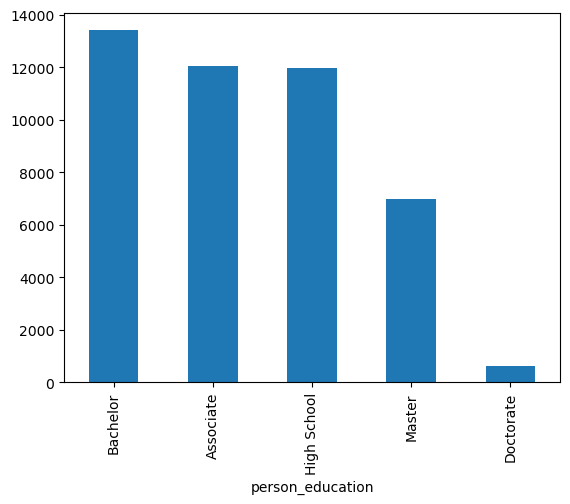

In [8]:
education.plot(kind='bar')
plt.show()

In [9]:
home=df['person_home_ownership'].value_counts()
home

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

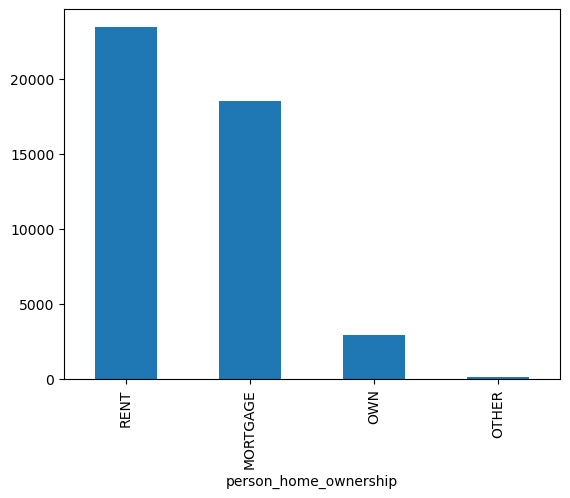

In [10]:
home.plot(kind='bar')
plt.show()

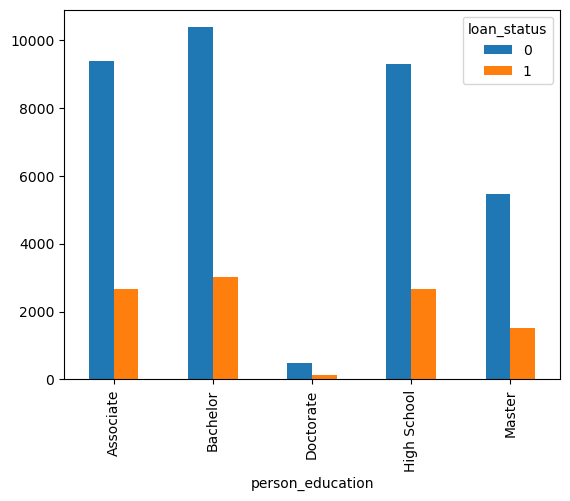

In [11]:
pd.crosstab(df['person_education'],df['loan_status']).plot(kind='bar')
plt.show()

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='count'>

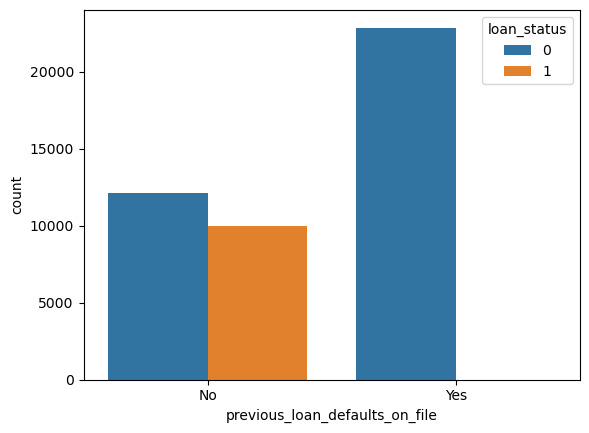

In [12]:
sns.countplot(data=df,x='previous_loan_defaults_on_file',hue='loan_status')

In [13]:
df['person_age'].agg(['min','mean','max']).round(2)

min      20.00
mean     27.76
max     144.00
Name: person_age, dtype: float64

In [14]:
df.duplicated().sum()

0

In [15]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [16]:
df.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [17]:
for feature in df.select_dtypes(include=['number']):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bond=Q1-1.5*IQR
    upper_bond=Q3+1.5*IQR
    if df[(df[feature]<lower_bond)| (df[feature]>upper_bond)].any().any():
        print(feature,"yes")
    else:
        print(feature,"NO")

person_age yes
person_income yes
person_emp_exp yes
loan_amnt yes
loan_int_rate yes
loan_percent_income yes
cb_person_cred_hist_length yes
credit_score yes
loan_status yes


In [18]:
for feature in ['person_age','person_income','person_emp_exp','loan_amnt',
                'loan_percent_income','cb_person_cred_hist_length','credit_score']:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bond = Q1 - 1.5 * IQR
    upper_bond = Q3 + 1.5 * IQR
    median = df[feature].median()

    df.loc[(df[feature] < lower_bond) | (df[feature] > upper_bond), feature] = median


In [19]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,45000.000000,45000.00000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,26.812644,70668.706667,4.61480,8623.517178,11.006606,0.134709,5.434622,634.244200,0.222222
std,4.185092,31651.673019,4.39614,4872.281839,2.978808,0.078880,3.149065,47.837372,0.415744
min,20.000000,8000.000000,0.00000,500.000000,5.420000,0.000000,2.000000,498.000000,0.000000
25%,24.000000,47204.000000,1.00000,5000.000000,8.590000,0.070000,3.000000,603.000000,0.000000
50%,26.000000,67048.000000,4.00000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,29.000000,88573.000000,7.00000,12000.000000,12.990000,0.180000,7.000000,670.000000,0.000000
max,39.000000,168653.000000,18.00000,23050.000000,20.000000,0.370000,15.000000,773.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int32  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [21]:
categorical=df.select_dtypes(include=['object'])
categorical

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


In [22]:
le=LabelEncoder()
for col in categorical:
    df[col]=le.fit_transform(df[col])

In [23]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948.0,0,3,8000.0,4,16.02,0.12,3.0,561,0,1
1,21,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25,0,3,12438.0,3,0,5500.0,3,12.87,0.12,3.0,635,0,1
3,23,0,1,79753.0,0,3,8000.0,3,15.23,0.12,2.0,675,0,1
4,24,1,4,66135.0,1,3,8000.0,3,14.27,0.12,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [24]:
x=df.drop(columns=['loan_status'])
y=df.loan_status

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
scaler=RobustScaler()
xtrainv=scaler.fit_transform(xtrain)
xtestv=scaler.transform(xtest)

In [28]:
lr=LogisticRegression()
lr.fit(xtrainv,ytrain)
y_pred_lr=lr.predict(xtestv)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7000
           1       0.76      0.74      0.75      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



<Axes: >

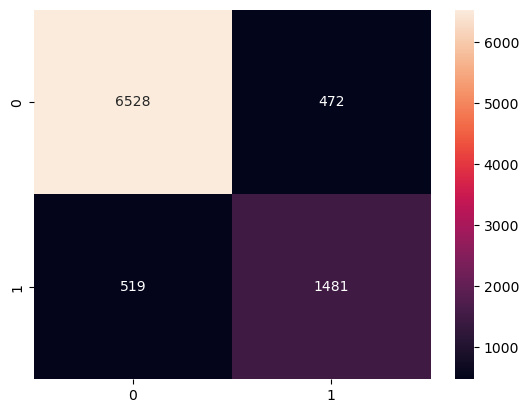

In [29]:
print(classification_report(ytest,y_pred_lr))
cm=confusion_matrix(ytest,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d')

In [30]:
dt=DecisionTreeClassifier()
dt.fit(xtrainv,ytrain)
y_pred_dt=dt.predict(xtestv)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7000
           1       0.76      0.77      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



<Axes: >

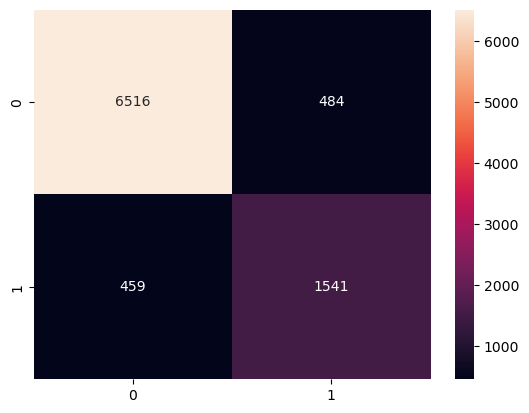

In [31]:
print(classification_report(ytest,y_pred_dt))
cm=confusion_matrix(ytest,y_pred_dt)
sns.heatmap(cm,annot=True,fmt='d')

In [32]:
rt=RandomForestClassifier(n_estimators=100)
rt.fit(xtrainv,ytrain)
y_pred_rt=rt.predict(xtestv)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7000
           1       0.88      0.76      0.82      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000



<Axes: >

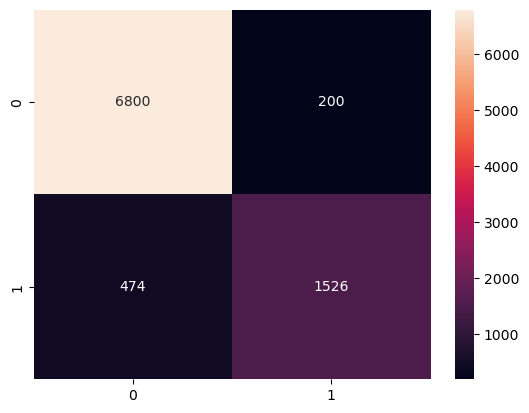

In [33]:
print(classification_report(ytest,y_pred_rt))
cm=confusion_matrix(ytest,y_pred_rt)
sns.heatmap(cm,annot=True,fmt='d')

In [34]:
st=SVC(C=5,kernel='rbf')
st.fit(xtrainv,ytrain)
y_pred_st=st.predict(xtestv)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7000
           1       0.82      0.75      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.87      0.85      0.86      9000
weighted avg       0.90      0.91      0.90      9000



<Axes: >

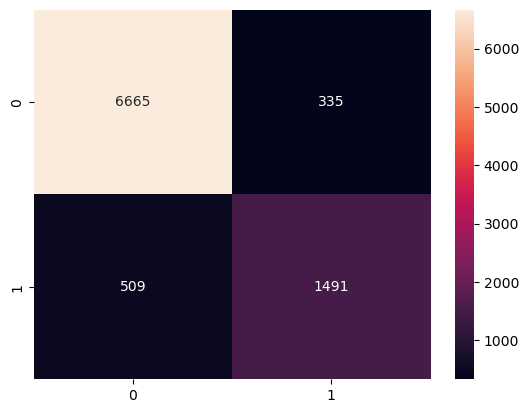

In [35]:
print(classification_report(ytest,y_pred_st))
cm=confusion_matrix(ytest,y_pred_st)
sns.heatmap(cm,annot=True,fmt='d')

In [36]:
xgb=XGBClassifier(objective='binary:logistic')
xgb.fit(xtrainv,ytrain)
y_pred_xg=xgb.predict(xtestv)

In [37]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.88      0.81      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



<Axes: >

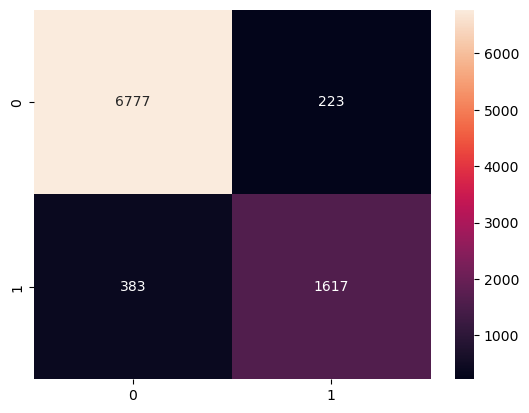

In [38]:
print(classification_report(ytest,y_pred_xg))
cm=confusion_matrix(ytest,y_pred_xg)
sns.heatmap(cm,annot=True,fmt='d')

In [39]:
import joblib
joblib.dump(xgb, 'xgb_model.pkl')
joblib.dump(rt, 'rf_model.pkl')
joblib.dump(dt, 'dt_model.pkl')
joblib.dump(lr, 'lr_model.pkl')

joblib.dump(scaler, 'robust_scaler.pkl')


['robust_scaler.pkl']